In [1]:
import os 
import random

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
curr = os.path.dirname(__name__)
data_dir = os.path.join(curr, '/home/riri/Desktop/Tensorflow/Img_dataset/train')

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,validation_split=0.2,
    subset='training', seed=123,
    image_size=(185, 185), batch_size=32 
)

Found 22566 files belonging to 80 classes.
Using 18053 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, validation_split=0.2,
    subset='validation', seed=123,
    image_size=(185, 185), batch_size=32
)

Found 22566 files belonging to 80 classes.
Using 4513 files for validation.


In [5]:
images_batch, labels_batch = next(iter(train_ds))
print(images_batch.shape)
print(labels_batch.shape)

(32, 185, 185, 3)
(32,)


In [6]:
class_names = train_ds.class_names
print(class_names)

['Bear', 'Brown Bear', 'Bull', 'Butterfly', 'Camel', 'Canary', 'Caterpillar', 'Cattle', 'Centipede', 'Cheetah', 'Chicken', 'Crab', 'Crocodile', 'Deer', 'Duck', 'Eagle', 'Elephant', 'Fish', 'Fox', 'Frog', 'Giraffe', 'Goat', 'Goldfish', 'Goose', 'Hamster', 'Harbor seal', 'Hedgehog', 'Hippopotamus', 'Horse', 'Jaguar', 'Jellyfish', 'Kangaroo', 'Koala', 'Ladybug', 'Leopard', 'Lion', 'Lizard', 'Lynx', 'Magpie', 'Monkey', 'Moths And Butterflies', 'Mouse', 'Mule', 'Ostrich', 'Otter', 'Owl', 'Panda', 'Parrot', 'Penguin', 'Pig', 'Polar Bear', 'Rabbit', 'Raccoon', 'Raven', 'Red Panda', 'Rhinoceros', 'Scorpion', 'Sea Lion', 'Sea Turtle', 'Sea horse', 'Shark', 'Sheep', 'Shrimp', 'Snail', 'Snake', 'Sparrow', 'Spider', 'Squid', 'Squirrel', 'Starfish', 'Swan', 'Tick', 'Tiger', 'Tortoise', 'Turkey', 'Turtle', 'Whale', 'Woodpecker', 'Worm', 'Zebra']


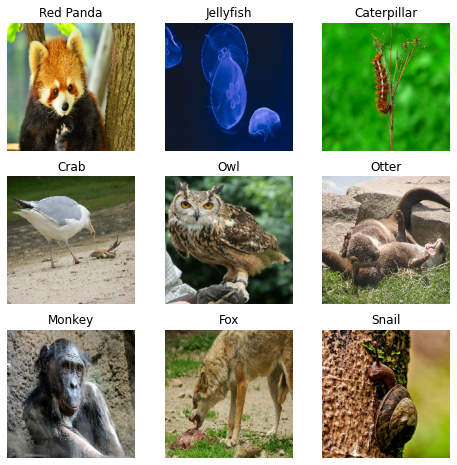

In [8]:
plt.figure(figsize=(8, 8))

for image, label in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
model = tf.keras.models.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(class_names))
])

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [13]:
model.fit(train_ds, validation_data=val_ds, epochs=3)

Epoch 1/3
111/565 [====>.........................] - ETA: 20:23 - loss: 4.0806 - accuracy: 0.0935